# Import packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras.datasets

### Understanding the original data 

The original a batch data is (10000 x 3072) dimensional tensor expressed in numpy array, where the number of columns, (10000), indicates the number of sample data. As stated in the [CIFAR-10/CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html), the row vector, (3072) represents an color image of 32x32 pixels. Since this project is going to use CNN for the classification tasks, the row vector, (3072), is not an appropriate form of image data to feed. In order to feed an image data into a CNN model, the dimension of the tensor representing an image data should be either (width x height x num_channel) or (num_channel x width x height). It depends on your choice (check out the [tensorflow conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)). In this particular project, I am going to use the dimension of the first choice because the default choice in tensorflow's CNN operation is so.

[O] need to be modified into a new shape

### Understanding the original labels

The label data is just a list of 10000 numbers in the range 0-9, which corresponds to each of the 10 classes in CIFAR-10. 

* **airplane**
* **automobile**
* **bird**
* **cat**
* **deer**
* **dog**
* **frog**
* **horse**
* **ship**
* **truck**

[X] need to be modified into a new shape


In [ ]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 83s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
# Lets take a look at shape of single image
X_train[0].shape

(32, 32, 3)

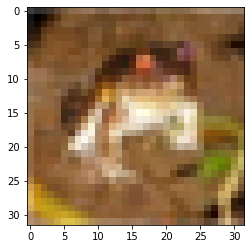

In [8]:
# 3 color channels
plt.imshow(X_train[0])

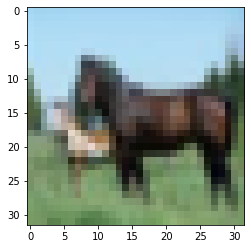

In [9]:
plt.imshow(X_train[12])

In [16]:
X_train[0].max(), X_train[0].min()

(255, 0)

In [17]:
# Lets scale them between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [18]:
X_train[0].max(), X_train[0].min()

(1.0, 0.0)

In [19]:
X_test.shape
# 10,000 images in test set

(10000, 32, 32, 3)

In [21]:
y_train # It will be read as continuous values due to their nature, so we 
# need to convert it into categorical values

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [22]:
from tensorflow.keras.utils import to_categorical

In [25]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

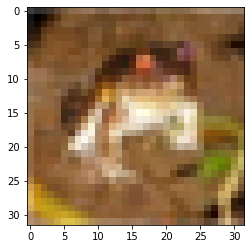

In [37]:
plt.imshow(X_train[0])

In [39]:
y_train[0] # Now what does 6 mean here? Frog, etc what?

array([6], dtype=uint8)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [41]:
32*32*3 
# Leads to more Conv2D and MaxPool2D

3072

In [42]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters= 32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size= (2,2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters= 32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size= (2,2)))


# FLATTEN 
model.add(Flatten())

# Dense
model.add(Dense(256, activation='relu'))

# Dense [OUTPUT]
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [46]:
model.fit(X_train, y_cat_train, epochs=15, 
         validation_data = (X_test, y_cat_test), callbacks= [early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 22s 432us/sample - loss: 1.4913 - accuracy: 0.4621 - val_loss: 1.2145 - val_accuracy: 0.5688
Epoch 2/15
50000/50000 [==============================] - 21s 427us/sample - loss: 1.1626 - accuracy: 0.5890 - val_loss: 1.1141 - val_accuracy: 0.6050
Epoch 3/15
50000/50000 [==============================] - 22s 440us/sample - loss: 1.0150 - accuracy: 0.6429 - val_loss: 1.0018 - val_accuracy: 0.6526
Epoch 4/15
50000/50000 [==============================] - 22s 447us/sample - loss: 0.8995 - accuracy: 0.6853 - val_loss: 0.9788 - val_accuracy: 0.6586
Epoch 5/15
50000/50000 [==============================] - 22s 431us/sample - loss: 0.8105 - accuracy: 0.7195 - val_loss: 0.9797 - val_accuracy: 0.6618
Epoch 6/15
50000/50000 [==============================] - 22s 440us/sample - loss: 0.7336 - accuracy: 0.7439 - val_loss: 0.9818 - val_accuracy: 0.6655


In [47]:
metrics = pd.DataFrame(model.history.history)

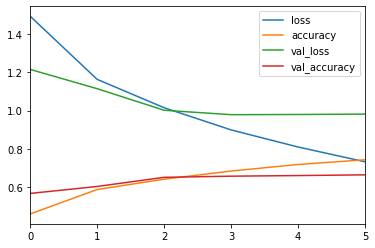

In [48]:
metrics.plot()

In [49]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

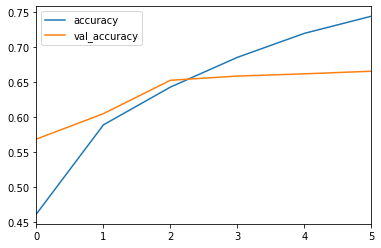

In [50]:
metrics[['accuracy', 'val_accuracy']].plot()

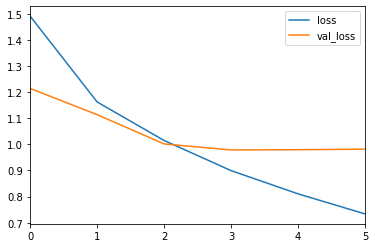

In [51]:
metrics[['loss', 'val_loss']].plot()

In [52]:
model.evaluate(X_test, y_cat_test, verbose=0) # This is basically the last epoch value while fitting

[0.9817644346237182, 0.6655]

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
predictions = model.predict_classes(X_test)

In [56]:
predictions

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [57]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70      1000
           1       0.83      0.72      0.77      1000
           2       0.65      0.43      0.52      1000
           3       0.53      0.37      0.44      1000
           4       0.59      0.69      0.64      1000
           5       0.65      0.52      0.58      1000
           6       0.67      0.81      0.74      1000
           7       0.75      0.72      0.73      1000
           8       0.76      0.78      0.77      1000
           9       0.60      0.85      0.70      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.66     10000
weighted avg       0.67      0.67      0.66     10000



In [63]:
# WHy class 3 is problematic?
[y_test == 3]

[array([[ True],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]])]

In [64]:
y_test[0]

array([3], dtype=uint8)

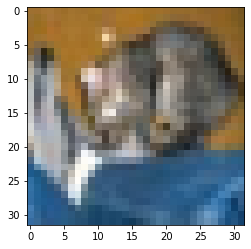

In [66]:
plt.imshow(X_test[0]) # Our model has problems with Cats XD!

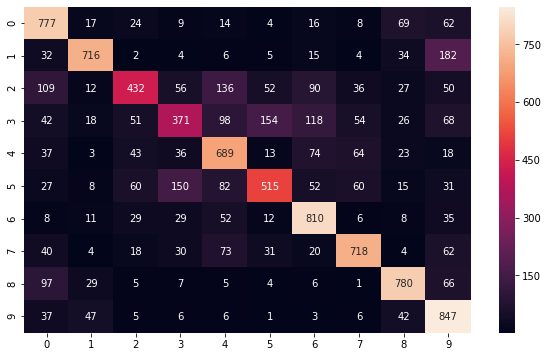

In [70]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [72]:
my_image = X_test[5]

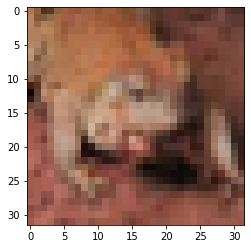

In [73]:
plt.imshow(my_image)

In [75]:
model.predict_classes(my_image.reshape(1,32,32,3)) # Correctly predicted Frog

array([6], dtype=int64)